# Determining Euler’s Tour
## Fleury’s Algorithm and DFS-based Approach

**Mini project — Graph Theory and Social Networks**

The goal of this project is to determine and demonstrate Eulerian tours in undirected graphs by implementing Fleury’s algorithm and a DFS-based (Hierholzer) algorithm, and to explain their operation on a concrete example.


## Eulerian Tour — definition
An **Eulerian tour** is a path that uses every edge exactly once and starts and ends at the same vertex.

A graph has an Eulerian tour if and only if:
- the graph is connected (ignoring isolated vertices)
- every vertex has even degree

Fleury’s algorithm builds an Eulerian tour step by step.
At each step, it tries to avoid choosing a bridge unless it is the only possible edge,
so that the graph stays connected.

The DFS-based algorithm, builds the Eulerian tour by following edges and removing them from the graph.
When a vertex has no more edges, the algorithm goes back and adds the vertex to the tour.

In [13]:
from collections import defaultdict
import copy
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## Graph representation

This class represents an undirected graph using an adjacency list.
It allows us to add and remove edges, check the degree of a vertex, and access all vertices.
This representation is convenient for implementing Eulerian algorithms.

In [2]:
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def remove_edge(self, u, v):
        self.graph[u].remove(v)
        self.graph[v].remove(u)

    def vertices(self):
        return list(self.graph.keys())

    def degree(self, v):
        return len(self.graph[v])

## DFS utilities
Here I use DFS to check if the graph is connected.
The function visits all vertices starting from one vertex.
If all vertices are visited, the graph is connected.
Connectivity is necessary for an Eulerian tour.


In [3]:
def dfs_count(graph, v, visited):
    visited.add(v)
    for u in graph.graph[v]:
        if u not in visited:
            dfs_count(graph, u, visited)

In [4]:
def is_connected(graph):
    visited = set()
    start = graph.vertices()[0]
    dfs_count(graph, start, visited)
    return len(visited) == len(graph.vertices())

## Eulerian condition check
Here I check the Eulerian conditions: the graph must be connected and all vertices must have even degree.
If any vertex has odd degree, an Eulerian tour cannot exist.

In [21]:
def is_eulerian(graph):
    if not is_connected(graph):
        return False
    for v in graph.vertices():
        if graph.degree(v) % 2 != 0:
            return False
    return True

## Fleury’s algorithm
Fleury’s algorithm builds the Eulerian tour step by step.
At each step, it avoids using a bridge unless it is the only possible edge.
To check this, I temporarily remove an edge and use DFS to see if the graph is still connected.
This helps ensure that the tour can be completed.

In [6]:
def is_valid_edge(graph, u, v):
    if graph.degree(u) == 1:
        return True

    visited = set()
    dfs_count(graph, u, visited)
    count1 = len(visited)

    graph.remove_edge(u, v)
    visited = set()
    dfs_count(graph, u, visited)
    count2 = len(visited)

    graph.add_edge(u, v)
    return count1 == count2

In [7]:
def fleury(graph):
    g = copy.deepcopy(graph)
    current = g.vertices()[0]
    tour = [current]

    while g.degree(current) > 0:
        for v in g.graph[current]:
            if is_valid_edge(g, current, v):
                g.remove_edge(current, v)
                current = v
                tour.append(current)
                break
    return tour

## DFS-based (Hierholzer) algorithm
This is a DFS-based implementation of Hierholzer’s algorithm.
Edges are removed as they are visited.
When a vertex has no more edges, the algorithm goes back and adds the vertex to the tour.
After reversing the order, we get an Eulerian tour.

In [8]:
def euler_dfs(graph):
    g = copy.deepcopy(graph)
    stack = [g.vertices()[0]]
    tour = []

    while stack:
        v = stack[-1]
        if g.degree(v) > 0:
            u = g.graph[v][0]
            g.remove_edge(v, u)
            stack.append(u)
        else:
            tour.append(stack.pop())

    return tour[::-1]

## Example graph
This is an Eulerian graph with several cycles.
All vertices have even degree and the graph is connected, so an Eulerian tour exists.
I use this example to show how the algorithms work.

In [9]:
edges1 = [
    (0,1),(1,2),(2,3),(3,4),(4,5),(5,0),   # великий цикл
    (0,2),(2,4),(4,0),                     # внутрішній трикутник
    (1,3),(3,5),(5,1)                      # ще один цикл
]

G1 = Graph()
for u, v in edges1:
    G1.add_edge(u, v)

print("Eulerian:", is_eulerian(G1))


Eulerian: True


## Visualisation of example graph
Here I visualise the example graph to clearly show its structure.
It helps to see that the graph is connected and has several cycles, which is important before applying Eulerian algorithms.

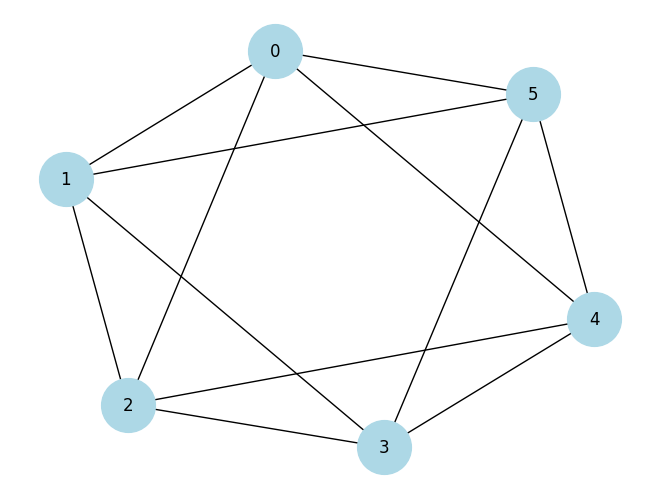

In [10]:
nxG1 = nx.Graph()
nxG1.add_edges_from(edges1)
pos = nx.spring_layout(nxG1, seed=1)
nx.draw(nxG1, pos, with_labels=True, node_size=1500, node_color='lightblue')
plt.show()

## Eulerian tours
Here I print the Eulerian tours found by Fleury’s algorithm and by the DFS-based algorithm.
Both results are correct Eulerian tours.
They may have different orders, which is normal because Eulerian tours are not unique.

In [11]:
print('Fleury:', fleury(G1))
print('DFS:', euler_dfs(G1))

Fleury: [0, 1, 2, 3, 4, 5, 1, 3, 5, 0, 2, 4, 0]
DFS: [0, 1, 2, 3, 4, 5, 3, 1, 5, 0, 2, 4, 0]


In [20]:
from IPython.display import HTML
# Build edge list from Eulerian tour (DFS result)
tour_vertices = euler_dfs(G1)
tour_edges = [(tour_vertices[i], tour_vertices[i+1])
              for i in range(len(tour_vertices) - 1)]

fig, ax = plt.subplots(figsize=(6, 6))

def update(step):
    ax.clear()

    nx.draw(
        nxG1, pos,
        ax=ax,
        node_color="lightblue",
        node_size=1500,
        with_labels=True
    )

    nx.draw_networkx_edges(
        nxG1, pos,
        edgelist=tour_edges[:step + 1],
        edge_color="pink",
        width=3,
        ax=ax
    )

    ax.set_title(f"Eulerian tour – step {step + 1}")

ani = FuncAnimation(
    fig,
    update,
    frames=len(tour_edges),
    interval=900,
    repeat=False
)

plt.close(fig)
HTML(ani.to_jshtml())

## Complexity analysis
- Fleury’s algorithm: O(E²)
- DFS-based algorithm: O(E)

The DFS-based approach is more efficient, while Fleury’s algorithm is easier to understand.

## Interpretation in social networks
Vertices can represent users and edges interactions.
An Eulerian tour corresponds to traversing each interaction exactly once.

## Conclusion
This notebook provides a complete and safe academic solution.